<a href="https://colab.research.google.com/github/dongcheol-noh/dongcheol-noh.github.io/blob/master/_%EB%94%A5%EB%9F%AC%EB%8B%9D%EA%B3%B5%EB%B6%80/_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%ED%8A%B9%EA%B0%95%202%EC%9D%BC%EC%B0%A8%20knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# nonlinear Classification

# KNN

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier


In [5]:
iris = load_iris()

In [6]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [7]:
X, y = iris.data, iris.target

In [8]:
X.shape, y.shape

((150, 4), (150,))

In [9]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

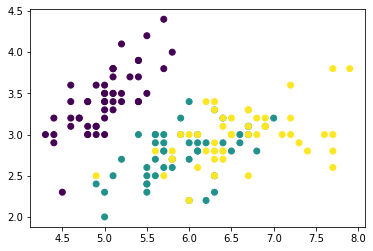

In [10]:
plt.scatter(X[:,0], X[:,1], c=y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
# for testing data split in knn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.96

In [13]:
X_train.shape, X_test.shape

((75, 4), (75, 4))

In [14]:
clf1 = SGDClassifier()
clf2 = KNeighborsClassifier(n_neighbors=9)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
print(clf1.score(X_test, y_test), clf2.score(X_test, y_test))

0.68 0.96


In [15]:
for i in range(1, 10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  print("k is :", i, "---", knn.score(X_test, y_test))

k is : 1 --- 0.9466666666666667
k is : 2 --- 0.9466666666666667
k is : 3 --- 0.9466666666666667
k is : 4 --- 0.96
k is : 5 --- 0.96
k is : 6 --- 0.96
k is : 7 --- 0.96
k is : 8 --- 0.96
k is : 9 --- 0.96


In [16]:
clf1.coef_, clf1.intercept_

(array([[  11.15485564,   30.18372703,  -43.30708661,  -20.34120735],
        [  52.93936596, -147.42997845,   -2.7700831 , -139.42751616],
        [-140.4853129 ,  -94.08258834,  200.08514261,  188.59088974]]),
 array([   9.71707898,  127.92857742, -116.63994465]))

In [17]:
pred = clf2.predict(X_test)
pred

array([1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 2, 0, 1, 2, 1, 1, 0,
       0, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 2, 1,
       0, 2, 2, 0, 2, 2, 0, 1, 1])

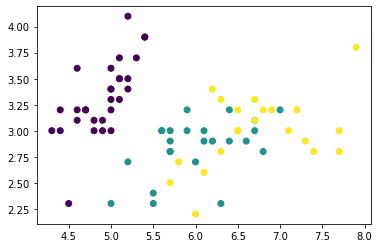

In [18]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)

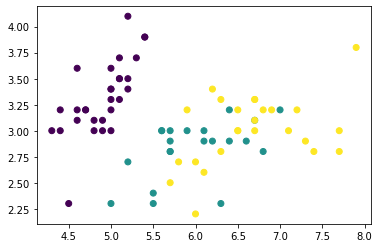

In [19]:
plt.scatter(X_test[:,0], X_test[:,1], c=pred)

# K-fold cross validation

In [20]:
from sklearn.model_selection import cross_val_score, KFold
knn = KNeighborsClassifier(n_neighbors=5)
cval = cross_val_score(knn, X, y, cv=5)
cval, cval.mean()

(array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 0.9733333333333334)

In [21]:
# linear model (non-scaled)
clf = SGDClassifier()
cval = cross_val_score(clf, X, y, cv=5)
cval, cval.mean()

(array([0.93333333, 0.8       , 0.66666667, 0.8       , 0.66666667]),
 0.7733333333333333)

In [22]:
# linear model (scaled)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

clf = SGDClassifier()
cval = cross_val_score(clf, X_scaled, y, cv=5)
cval, cval.mean()

(array([0.96666667, 0.96666667, 0.93333333, 0.9       , 0.96666667]),
 0.9466666666666667)

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
cval = cross_val_score(knn, X_scaled, y, cv=5)
cval, cval.mean()

(array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ]), 0.96)

# Decision Tree 

In [24]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [25]:
X.shape, y.shape

((150, 4), (150,))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9777777777777777


In [27]:
clf.feature_importances_

array([0.        , 0.02152227, 0.90685145, 0.07162627])

[Text(0.4, 0.9166666666666666, 'X[2] <= 2.5\ngini = 0.664\nsamples = 105\nvalue = [35, 39, 31]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.5, 0.75, 'X[2] <= 4.95\ngini = 0.493\nsamples = 70\nvalue = [0, 39, 31]'),
 Text(0.2, 0.5833333333333334, 'X[3] <= 1.7\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.3, 0.4166666666666667, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5833333333333334, 'X[3] <= 1.7\ngini = 0.067\nsamples = 29\nvalue = [0, 1, 28]'),
 Text(0.7, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.6, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.25, 'X[2] <= 5.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.7, 0.08333333333333

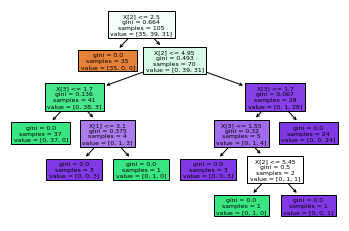

In [28]:
# decision tree graph
tree.plot_tree(clf, filled=True)

In [29]:
from sklearn.tree import export_graphviz
import graphviz

In [30]:
export_graphviz(
    clf,
    out_file='./iris.dot',
    feature_names = iris.feature_names,
    class_names = iris.target_names,
    filled = True
    )

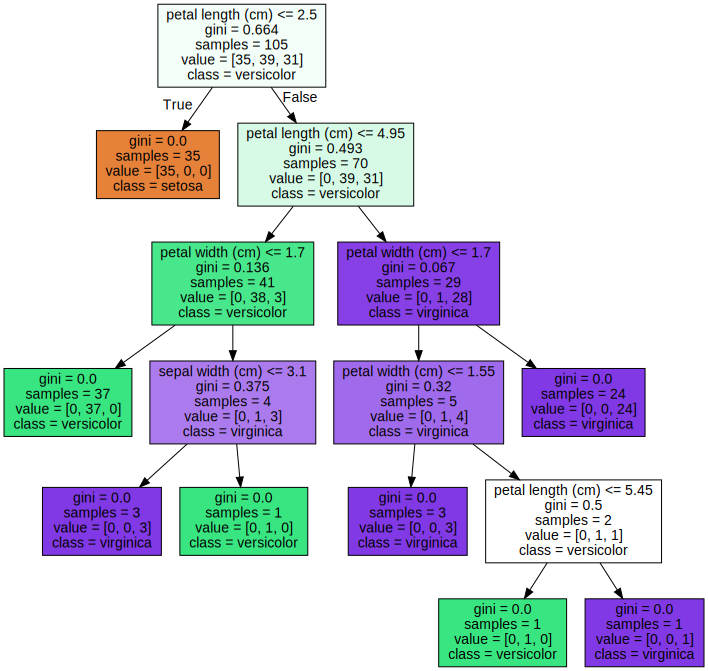

In [31]:
with open("./iris.dot") as f:
  dot_graph = str(open("./iris.dot", "rb").read(), "utf8")
graphviz.Source(dot_graph)

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [33]:
X.shape, y.shape

((150, 4), (150,))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)


0.9555555555555556

In [35]:
rfc.feature_importances_

array([0.0970512 , 0.03348085, 0.42436489, 0.44510306])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gbc = GradientBoostingClassifier(n_estimators = 200)
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.9555555555555556

In [37]:
gbc.feature_importances_

array([0.00292291, 0.00177039, 0.17724741, 0.8180593 ])

# with little bigger dataset

In [38]:
from sklearn.datasets import load_breast_cancer

In [39]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9122807017543859

In [40]:
X.shape, y.shape

((569, 30), (569,))

In [41]:
clf.feature_importances_

array([0.        , 0.00478997, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01564072, 0.00547425, 0.        , 0.01466208, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.13911456, 0.        , 0.00177694, 0.00954208, 0.02540391,
       0.        , 0.        , 0.76151186, 0.00497659, 0.01710704])

In [42]:
# cancer.feature_names
df = pd.DataFrame(list(zip(cancer.feature_names, clf.feature_importances_)))

In [43]:
df.columns = ['feature', 'importance']

In [44]:
df = df.sort_values(by='importance', ascending=False)

In [45]:
df.head()

,feature,importance
27,worst concave points,0.761512
20,worst radius,0.139115
24,worst smoothness,0.025404
29,worst fractal dimension,0.017107
10,radius error,0.015641


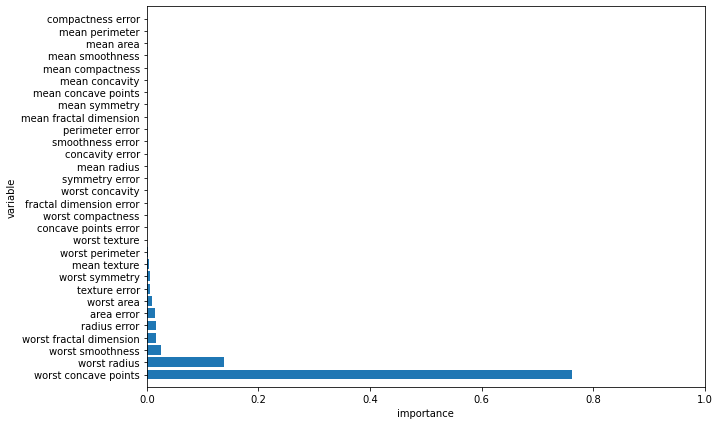

In [46]:
x = df.feature
y = df.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('importance')
plt.ylabel('variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()

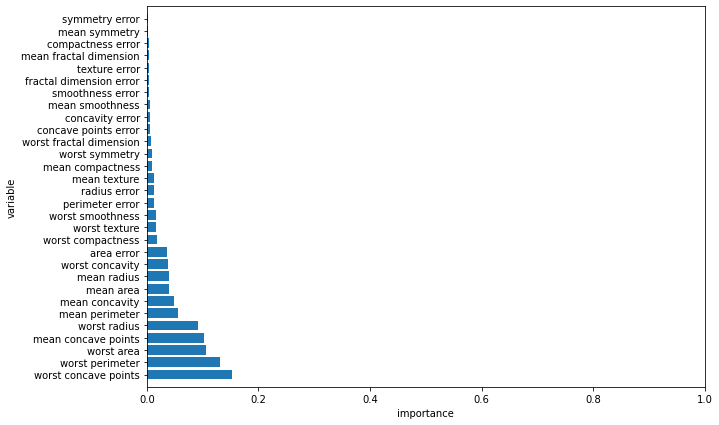

In [47]:
# randomforest
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)
df = pd.DataFrame(list(zip(cancer.feature_names, rfc.feature_importances_)))
df.columns = ['feature', 'importance']
df = df.sort_values(by='importance', ascending=False)

x = df.feature
y = df.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('importance')
plt.ylabel('variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()

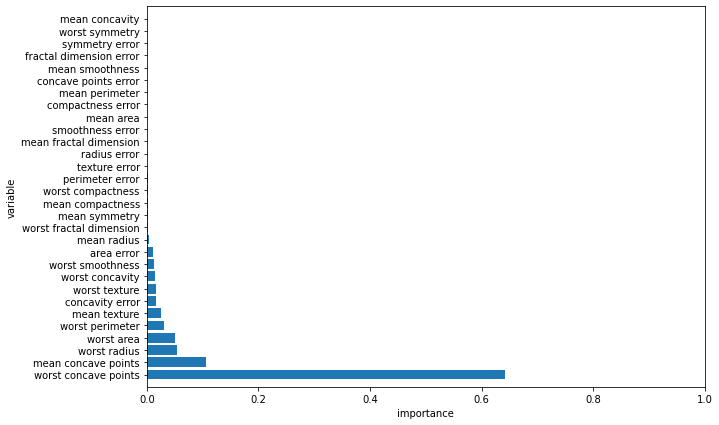

In [48]:
gbc = GradientBoostingClassifier(n_estimators=1000)
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

df = pd.DataFrame(list(zip(cancer.feature_names, gbc.feature_importances_)))
df.columns = ['feature', 'importance']
df = df.sort_values(by='importance', ascending=False)

x = df.feature
y = df.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('importance')
plt.ylabel('variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()